# Лабораторная работа 3.4.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 

In [2]:
# функция мнк

def lsf(x, y, functional=True):
    x_avg = np.average(x)
    y_avg = np.average(y)
    xy_avg = np.average(x * y)
    x2_avg = np.average(np.square(x))
    y2_avg = np.average(np.square(y))
    count = len(x)
    
    print('x=', x_avg, 'y=', y_avg)
    print('x2=', x2_avg, 'y2=', y2_avg, 'xy=', xy_avg)
    
    b = (xy_avg - x_avg * y_avg) / (x2_avg - x_avg ** 2)
    b_error = ((y2_avg - y_avg ** 2)/(x2_avg - x_avg ** 2) - b ** 2) ** 0.5 / count ** 0.5
    a = y_avg - b * x_avg
    a_error = b_error * (x2_avg - x_avg ** 2) ** 0.5
    
    if functional:
        f = lambda x: b * x + a
        return f, (b, a, b_error, a_error)
    
    return b, a, b_error, a_error

In [37]:
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

## Градуировка

In [5]:
I = np.array([0.3, 0.7, 1.1, 1.5, 1.9, 2.3, 2.6, 3.0])
Ф = np.array([0.4, 1.3, 2.7, 3.6, 4.5, 5.4, 6, 6.7])
B = Ф / 72e-4 # mT

array([ 55.55555556, 180.55555556, 375.        , 500.        ,
       625.        , 750.        , 833.33333333, 930.55555556])

x= 1.6749999999999998 y= 531.25
x2= 3.5875 y2= 367476.85185185185 xy= 1147.0486111111113


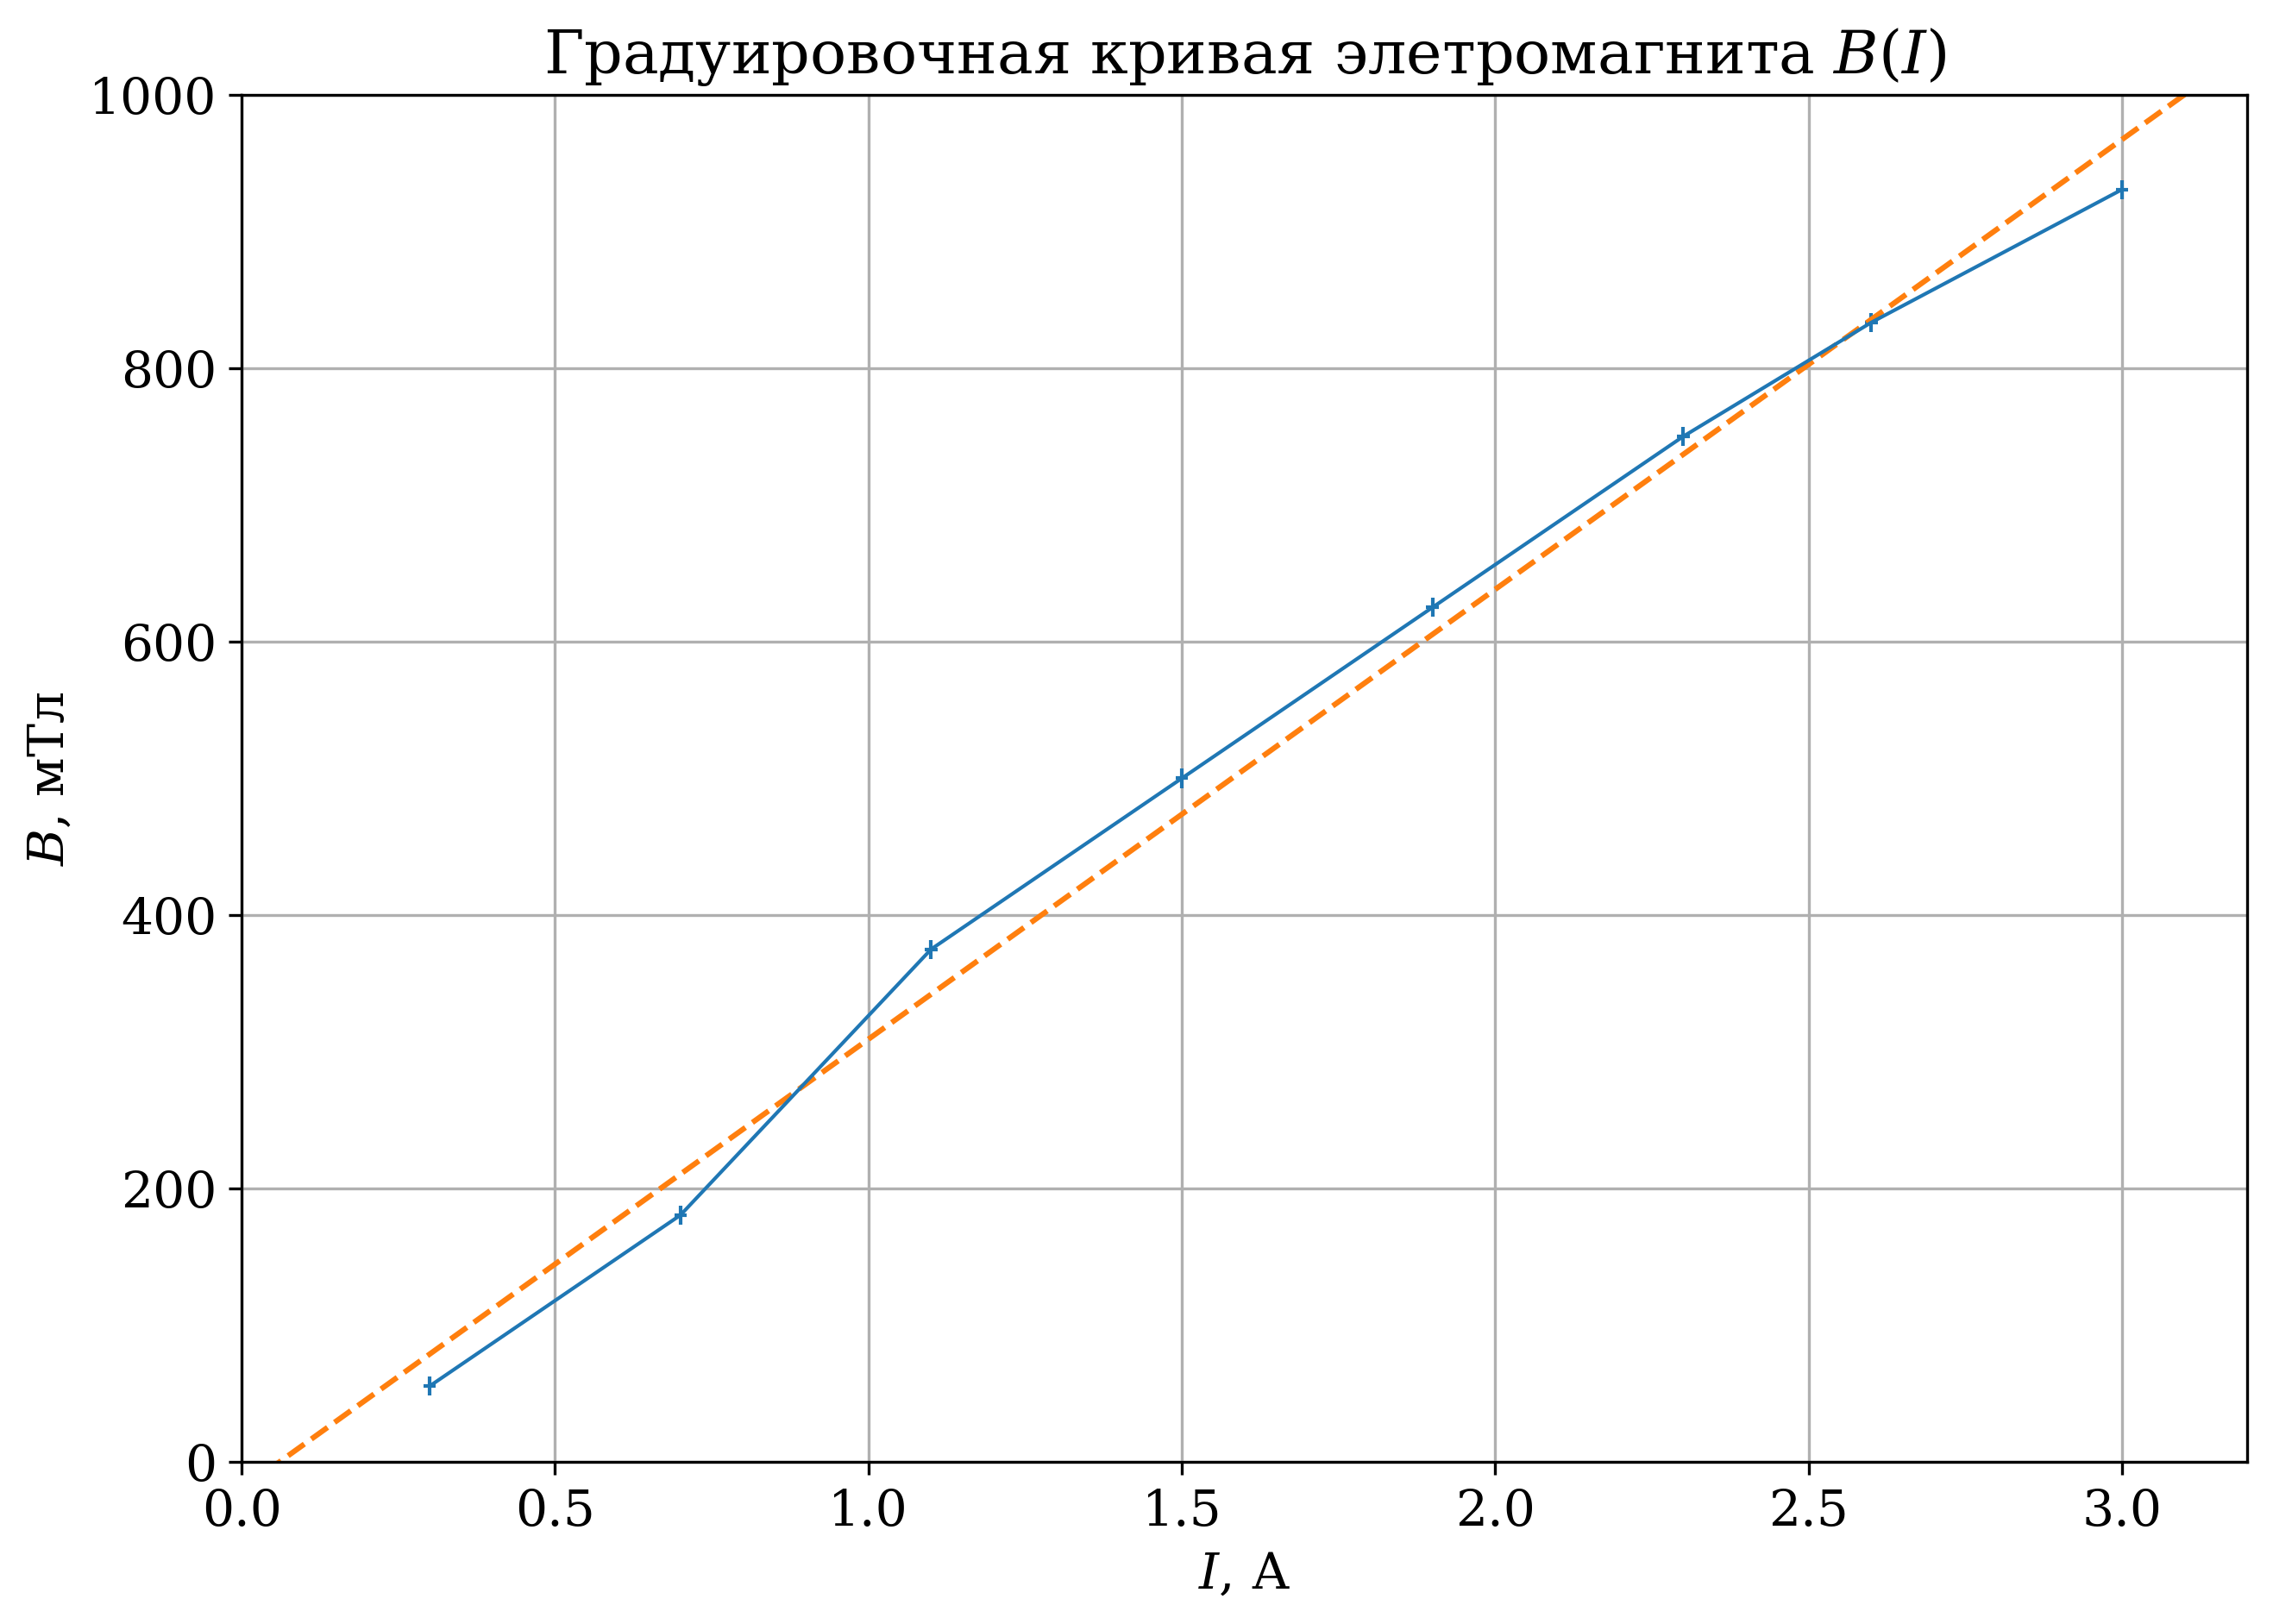

In [46]:
# plt.scatter(I, B)
# plt.plot(I, B, ls="-")
plt.errorbar(I, B, 7, 0.01, lw=1)

f, _ = lsf(I, B)
plt.plot(np.linspace(0, 3.2, 2), f(np.linspace(0, 3.2, 2)), ls="--")

plt.xlim([0, 3.2])
plt.ylim([0, 1000])

plt.title("Градуировочная кривая элетромагнита $B(I)$")
plt.xlabel("$I$, А")
plt.ylabel("$B$, мТл")

plt.savefig('grad_plot.png')

## Коэффициент хи

In [133]:
B2_up = np.array([0, 56., 181., 375., 500.,625., 750., 833., 931.]) ** 2
B2_dw = np.array([0, 56., 181., 375., 500.,625., 750., 833.]) ** 2

P_Cu_up = np.array([0, 0 , -20 , -39 , -59 , -108 , -137 , -166 , -206])
P_Cu_dw = np.array([0 , -20 , -30 , -59 , -88 , -118 , -157 , -176])

f_Cu_up, coeff_Cu_up = lsf(B2_up, P_Cu_up)
f_Cu_dw, coeff_Cu_dw = lsf(B2_dw[1:], P_Cu_dw[1:])

P_Al_up = np.array([0, 0, 10, 39, 98, 166 , 255 , 314 , 402])
P_Al_dw = np.array([20 , 20 , 20 , 69 ,108 , 186 , 265 , 333])

f_Al_up, coeff_Al_up = lsf(B2_up, P_Al_up)
f_Al_dw, coeff_Al_dw = lsf(B2_dw[1:], P_Al_dw[1:])

P_C_up = np.array([0 , 78 , 235 , 363 , 382 , 382 , 333 , 274 , 98 ])
P_C_dw = np.array([78 , 167 , 323 , 451 , 451 , 451 , 363 , 255])


coeff_Cu_up


x= 326699.6666666667 y= -81.66666666666667
x2= 198345469367.66666 y2= 11758.555555555555 xy= -48208659.44444445
x= 296219.4285714286 y= -92.57142857142857
x2= 147690656169.7143 y2= 11724.857142857143 xy= -41124734.14285714
x= 326699.6666666667 y= 142.66666666666666
x2= 198345469367.66666 y2= 40445.11111111111 xy= 89434700.33333333
x= 296219.4285714286 y= 143.0
x2= 147690656169.7143 y2= 33276.42857142857 xy= 70029264.57142857


(-0.00023499104199703257,
 -4.895171576583451,
 6.050077914513215e-06,
 1.8312137445629328)

((-0.00023499104199703257,
  -4.895171576583451,
  6.050077914513215e-06,
  1.8312137445629328),
 (-0.0002285986422106278,
  -24.856069403591945,
  7.37724432205219e-06,
  1.8062155845805297))

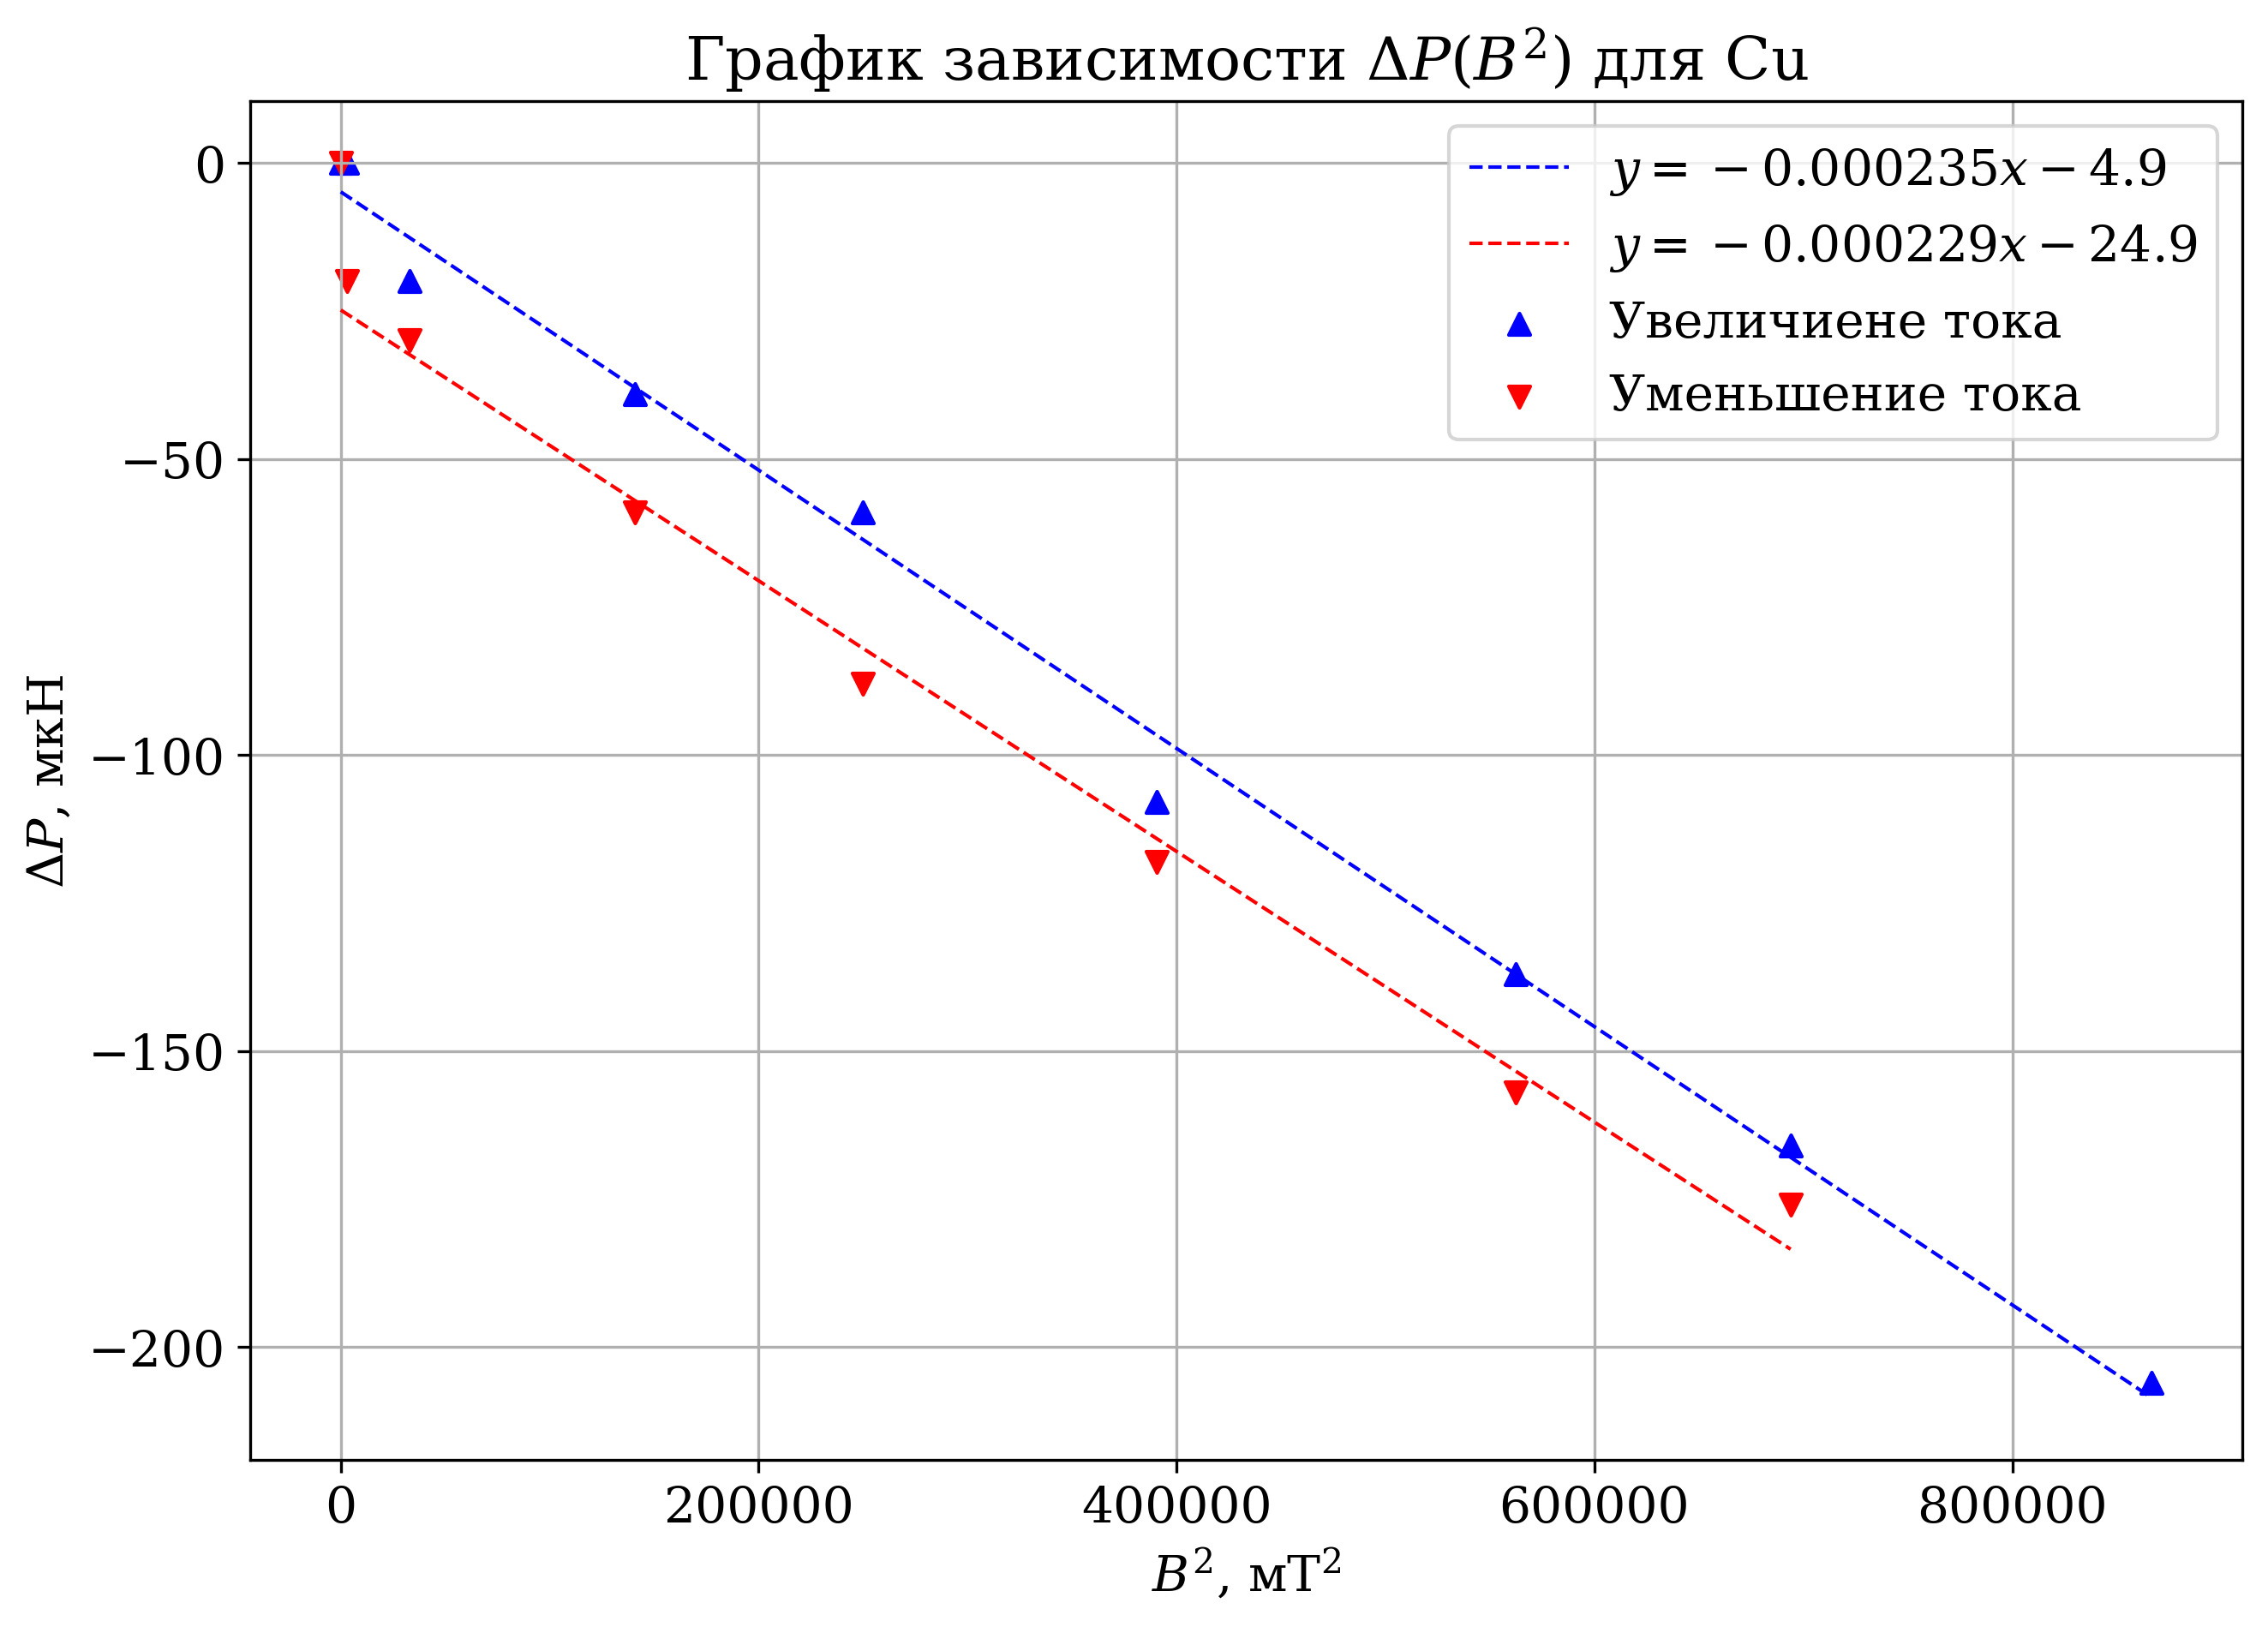

In [139]:
plt.title("График зависимости $\Delta P (B^2)$ для Cu")
plt.ylabel("$\Delta P$, мкН")
plt.xlabel("$B^2$, мТ$^2$")

plt.scatter(B2_up, P_Cu_up, marker="^", color="blue", label="Увеличиене тока")
plt.plot(B2_up, f_Cu_up(B2_up), color="blue", ls="--", lw=1, label="$y = {:.3} x {:+.3}$".format(coeff_Cu_up[0], coeff_Cu_up[1]))

plt.scatter(B2_dw, P_Cu_dw, marker="v", color="red", label="Уменьшение тока")
plt.plot(B2_dw, f_Cu_dw(B2_dw), color="red", ls="--", lw=1, label="$y = {:.3} x {:+.3}$".format(coeff_Cu_dw[0], coeff_Cu_dw[1]))

plt.legend()
plt.savefig("plot_cu.png")
coeff_Cu_up, coeff_Cu_dw

((0.00046746250756390457,
  -10.053178733625117,
  9.344430431389864e-06,
  2.8283353839171252),
 (0.00046159015517104664,
  6.268028001035503,
  1.1477976790781823e-05,
  2.8102228493357844))

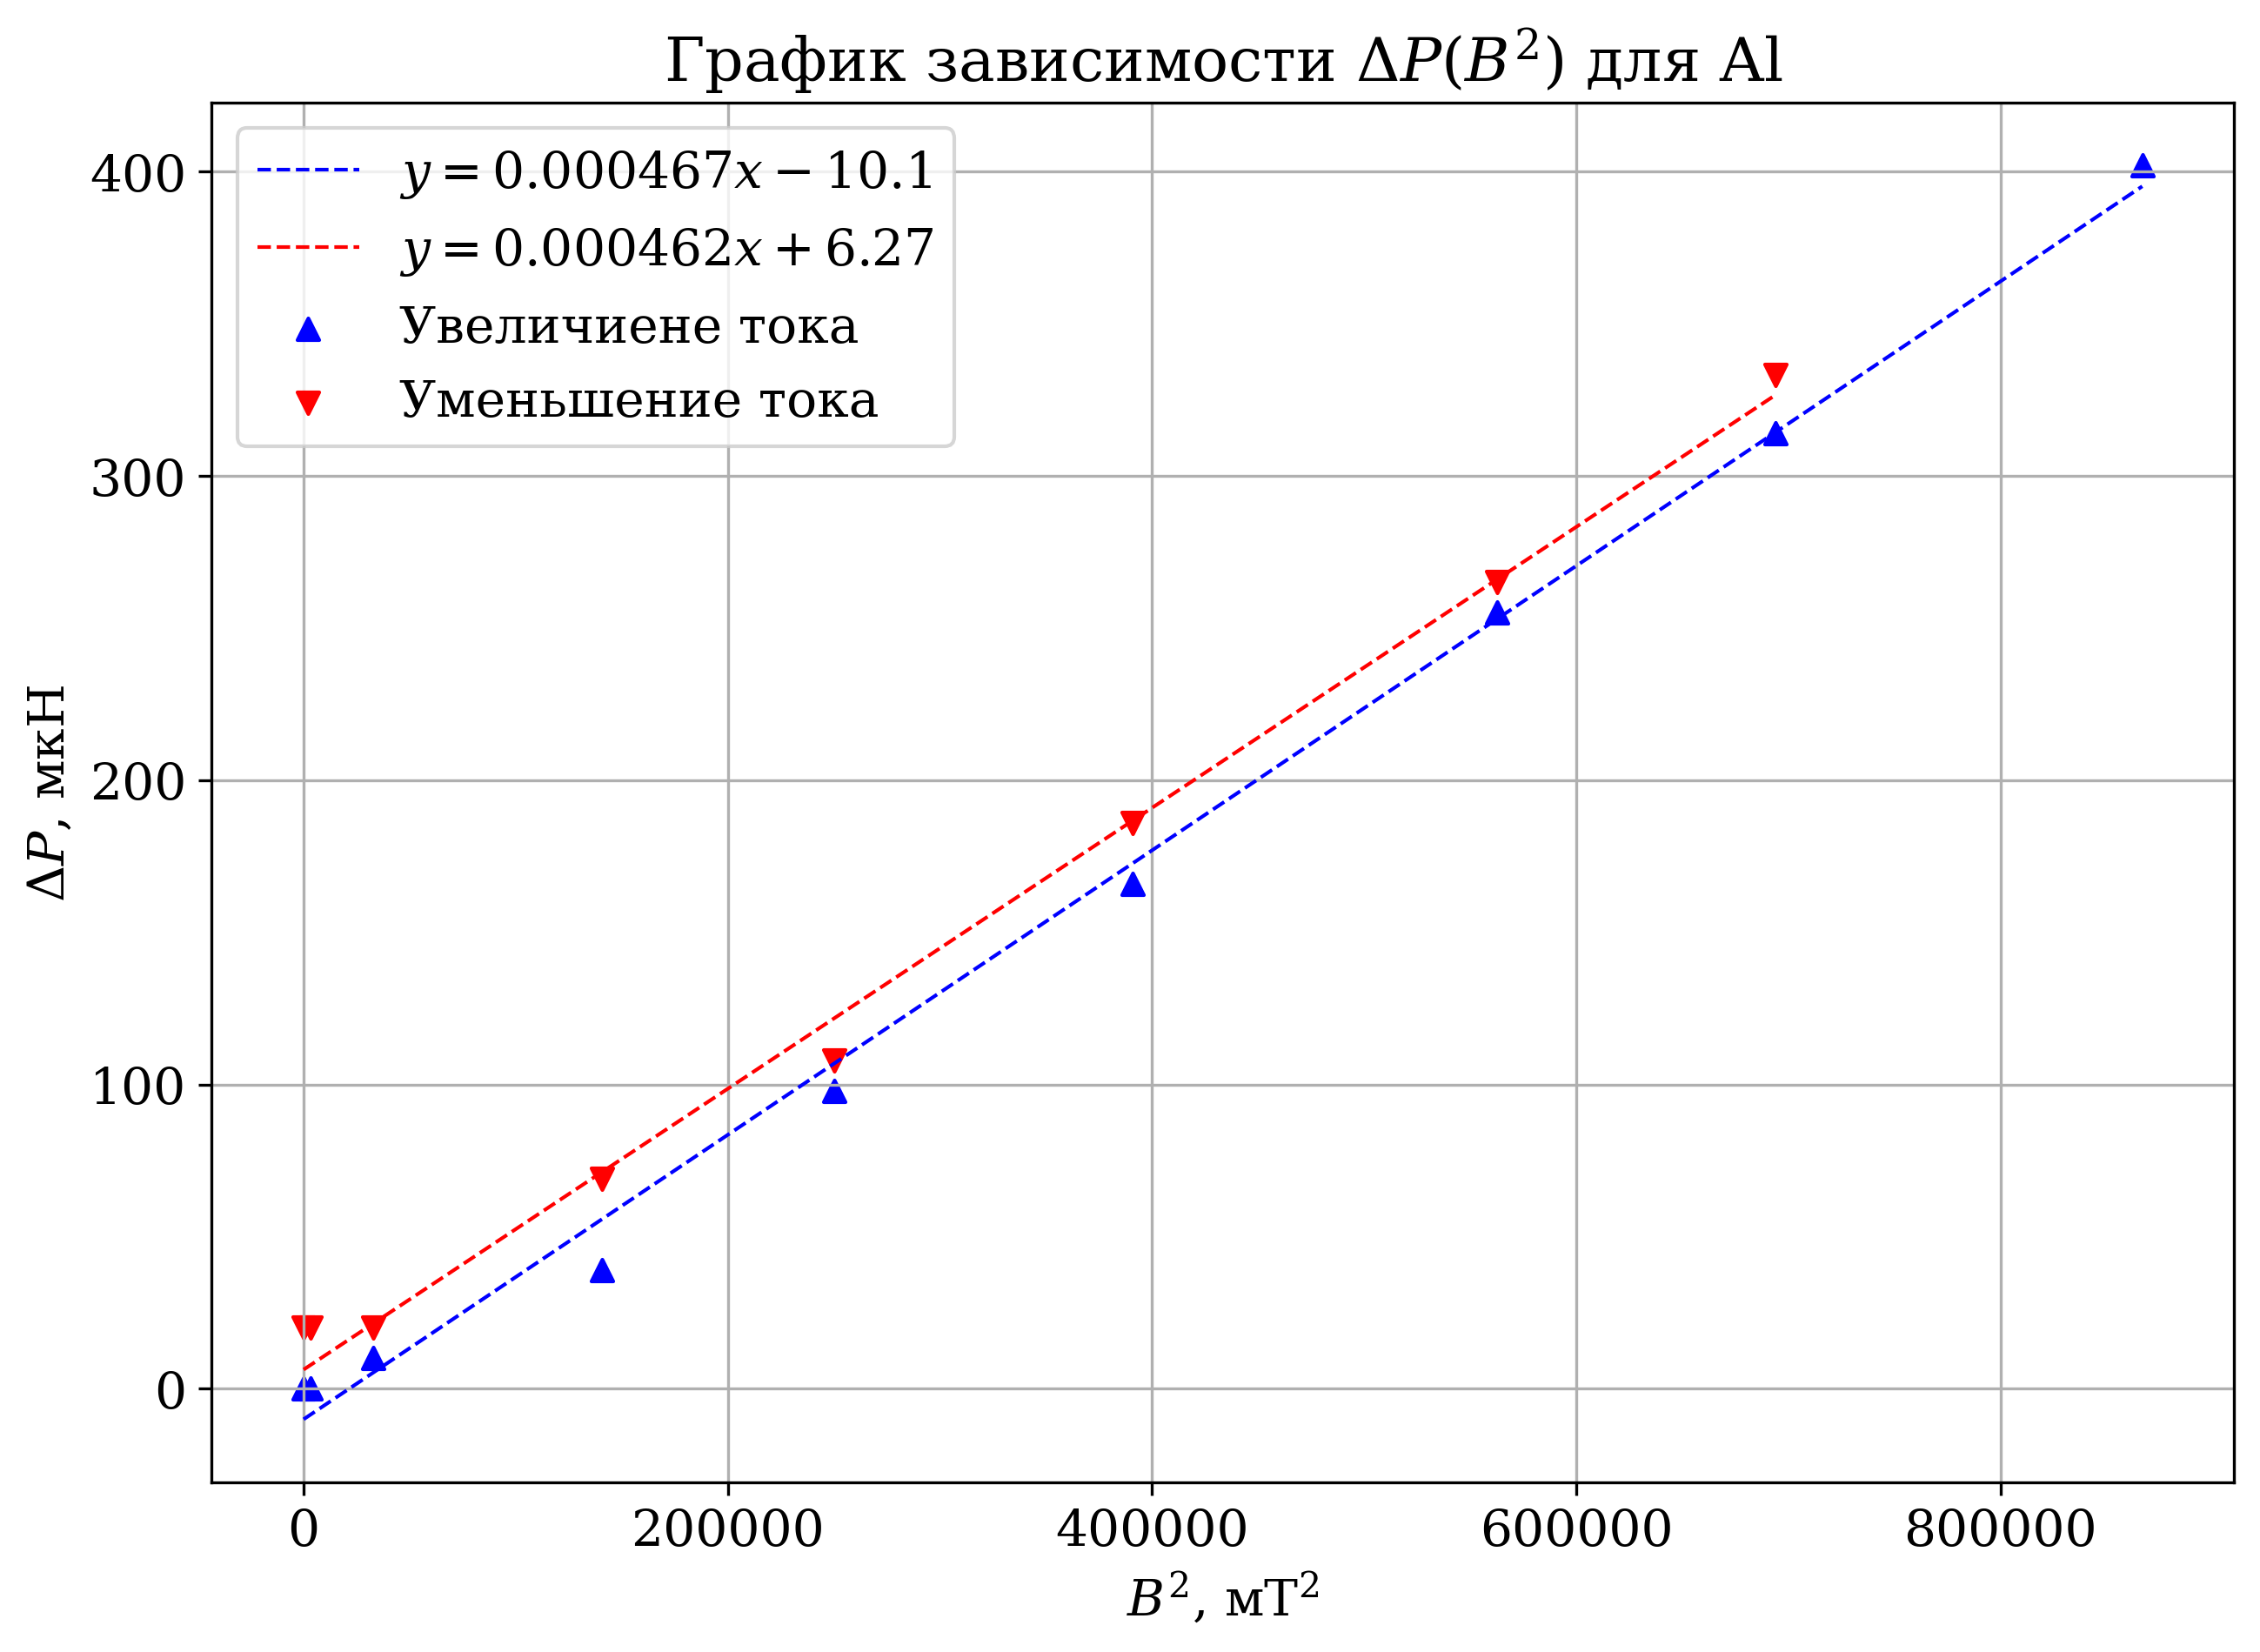

In [140]:
plt.title("График зависимости $\Delta P (B^2)$ для Al")
plt.ylabel("$\Delta P$, мкН")
plt.xlabel("$B^2$, мТ$^2$")

plt.scatter(B2_up, P_Al_up, marker="^", color="blue", label="Увеличиене тока")
plt.plot(B2_up, f_Al_up(B2_up), color="blue", ls="--", lw=1, label="$y = {:.3} x {:+.3}$".format(coeff_Al_up[0], coeff_Al_up[1]))

plt.scatter(B2_dw, P_Al_dw, marker="v", color="red", label="Уменьшение тока")
plt.plot(B2_dw, f_Al_dw(B2_dw), color="red", ls="--", lw=1, label="$y = {:.3} x {:+.3}$".format(coeff_Al_dw[0], coeff_Al_dw[1]))

plt.legend()
plt.savefig("plot_al.png")
coeff_Al_up, coeff_Al_dw

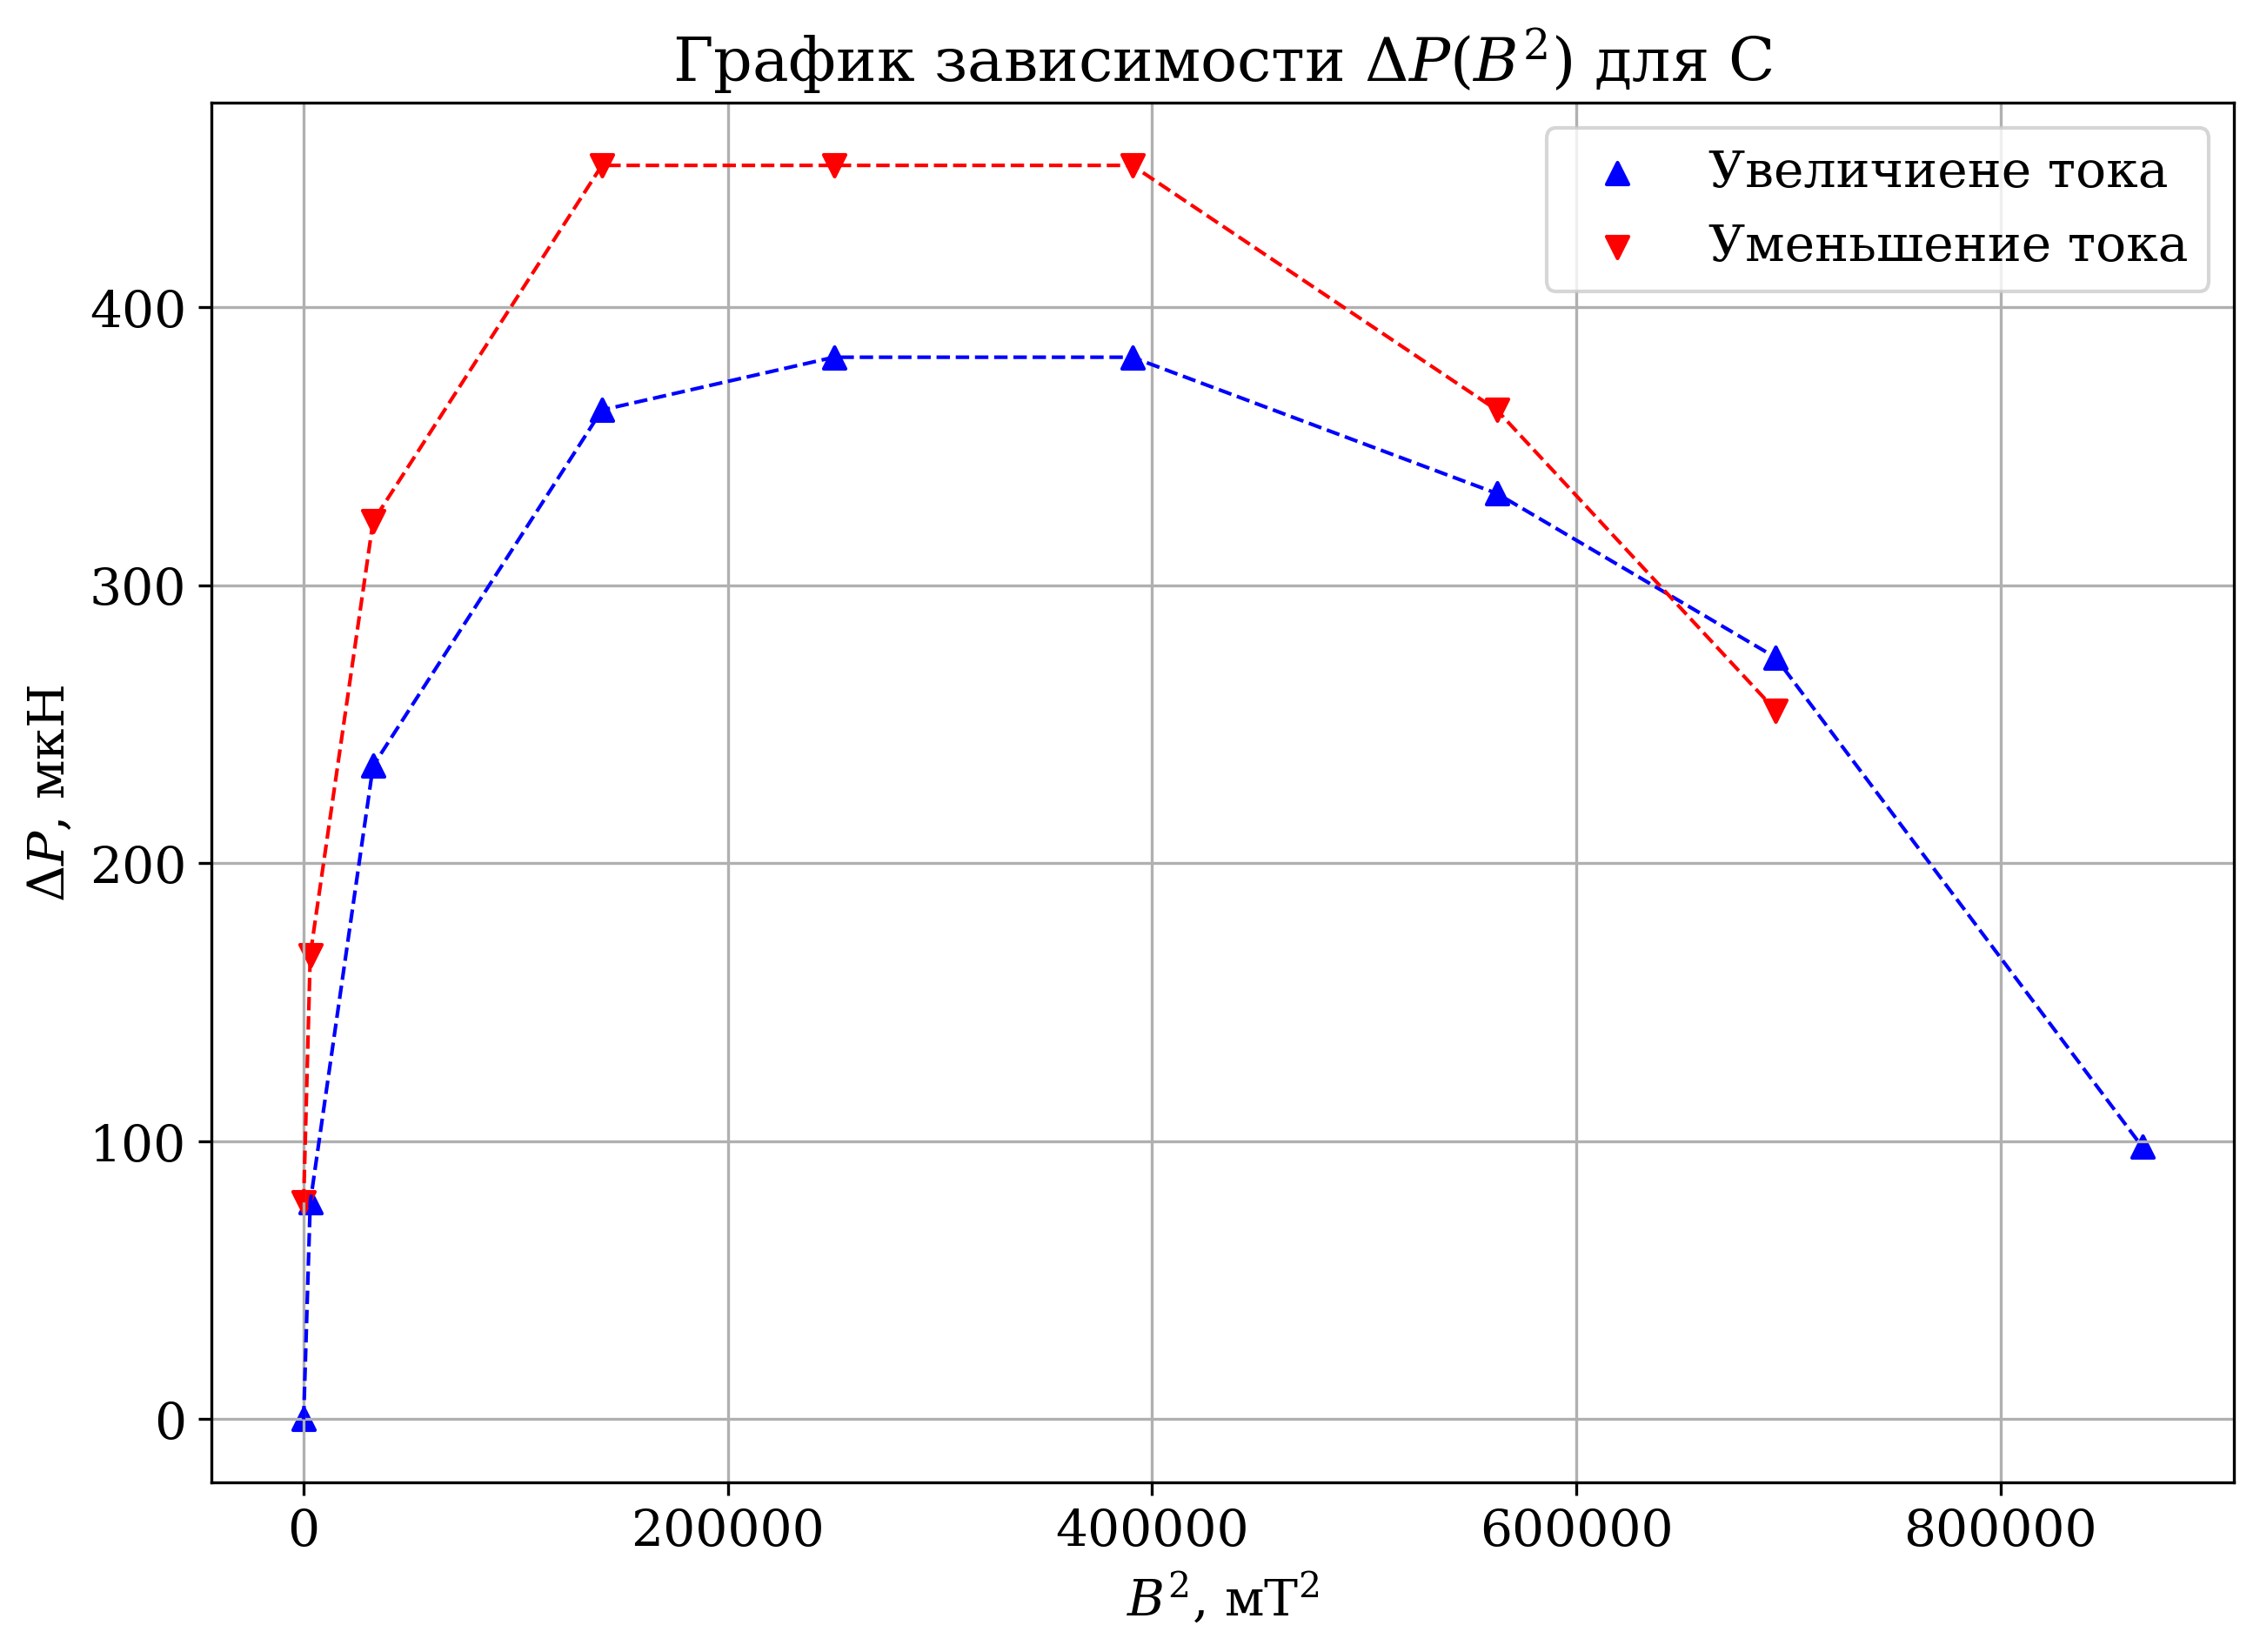

In [141]:
plt.title("График зависимости $\Delta P (B^2)$ для C")
plt.ylabel("$\Delta P$, мкН")
plt.xlabel("$B^2$, мТ$^2$")

plt.scatter(B2_up, P_C_up, marker="^", color="blue", label="Увеличиене тока")
plt.plot(B2_up, P_C_up, color="blue", ls="--", lw=1)

plt.scatter(B2_dw, P_C_dw, marker="v", color="red", label="Уменьшение тока")
plt.plot(B2_dw,  P_C_dw, color="red", ls="--", lw=1)

plt.legend()
plt.savefig("plot_c.png")